# Predictive Modelling

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# read in the file 
Restaurant_enterprise_data_task3= pd.read_csv(r"C:\Users\HP\Documents\cognifyz\model prediction restaurant data.csv")

# look at the first few lines
Restaurant_enterprise_data_task3.head()

,Unnamed: 0,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Number of Cuisines,Is Cafe,Is Bar,Table Booking_No,Table Booking_Yes
0,0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Dark Green,Excellent,314,16,71,3,False,False,0,1
1,1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Dark Green,Excellent,591,16,67,1,False,False,0,1
2,2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Green,Very Good,270,22,56,4,False,False,0,1
3,3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,...,Dark Green,Excellent,365,4,70,2,False,False,1,0
4,4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,...,Dark Green,Excellent,229,11,64,2,False,False,0,1


In [3]:
# Select relevant features
features = [
    'Longitude', 'Latitude', 'Average Cost for two',
    'Price range', 'Votes','Number of Cuisines', 'Is Cafe', 'Is Bar', 'Table Booking_No', 'Table Booking_Yes'
]
target = 'Aggregate rating'

In [4]:
# Handle missing values (fill or drop as appropriate)
Restaurant_enterprise_data_task3.fillna(Restaurant_enterprise_data_task3.mean(numeric_only=True), inplace=True)

In [5]:
# Convert boolean columns to integers
Restaurant_enterprise_data_task3['Is Cafe'] = Restaurant_enterprise_data_task3['Is Cafe'].astype(int)
Restaurant_enterprise_data_task3['Is Bar'] = Restaurant_enterprise_data_task3['Is Bar'].astype(int)

In [6]:
# Split the data into features (X) and target (y)
X = Restaurant_enterprise_data_task3[features]
y = Restaurant_enterprise_data_task3[target]

In [7]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train a regression model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.20369239490668067
Mean Squared Error (MSE): 0.0957776667466132
R-squared (R2): 0.9579204391554245


In [10]:
#Checking feature importance cos it a tree basede model

In [11]:
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importances)

Votes                   0.949126
Longitude               0.021639
Latitude                0.015849
Average Cost for two    0.007534
Number of Cuisines      0.003030
Price range             0.001032
Is Cafe                 0.000646
Is Bar                  0.000456
Table Booking_No        0.000364
Table Booking_Yes       0.000324
dtype: float64


In [12]:
#Normalizing data

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])


C:\Users\HP\AppData\Local\Temp\ipykernel_6056\999829212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[features] = scaler.fit_transform(X[features])


In [14]:
#Model Choice:

#Experiment with different regression models, such as:
#Linear Regression: Simple and interpretable.
#Random Forest Regressor: Handles non-linear relationships well.
#Gradient Boosting (e.g., XGBoost, LightGBM): Often yields better performance

In [16]:
#Hyperparameter Tuning:

#Use Grid Search or Random Search for hyperparameter optimization
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [17]:
# Retrain a regression model based on fine tuned data
model = RandomForestRegressor(random_state=42, max_depth=20, min_samples_split=10, n_estimators=200)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [18]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.20012649044456152
Mean Squared Error (MSE): 0.092968068595936
R-squared (R2): 0.959154825629288


# Customer Preference Analysis. Level 3 (Task 2)

In [19]:
# Analyzing the relationship between the type of cuisine and the restaurant's rating

In [21]:
import matplotlib.pyplot as plt

       Cuisines  Aggregate rating
131       Sunda          4.900000
26       B�_rek          4.700000
133   Taiwanese          4.650000
113       Ramen          4.500000
43      Dim Sum          4.466667
61     Hawaiian          4.412500
47       D�_ner          4.400000
23   Bubble Tea          4.400000
40        Curry          4.400000
75        Kebab          4.380000


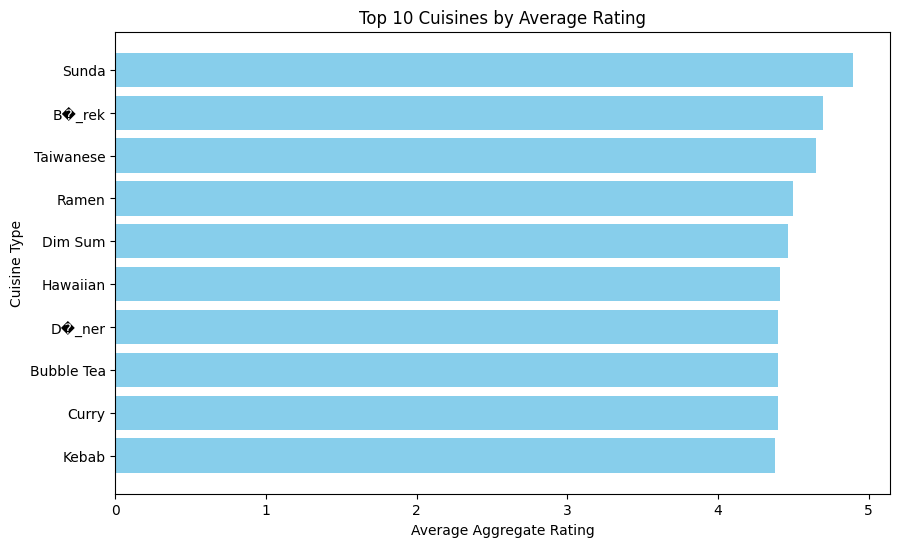

In [22]:
# Handle missing values in relevant columns
Restaurant_enterprise_data_task3['Cuisines'] = Restaurant_enterprise_data_task3['Cuisines'].fillna('Unknown')
Restaurant_enterprise_data_task3['Aggregate rating'] = Restaurant_enterprise_data_task3['Aggregate rating'].fillna(0)

# Split multiple cuisines into separate rows
df_cuisines = Restaurant_enterprise_data_task3.assign(Cuisines=Restaurant_enterprise_data_task3['Cuisines'].str.split(',')).explode('Cuisines')

# Clean whitespace from cuisine names
df_cuisines['Cuisines'] = df_cuisines['Cuisines'].str.strip()

# Group by cuisine type and calculate the average rating
cuisine_ratings = df_cuisines.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort by rating for better visualization
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Display the top 10 cuisines by average rating
print(cuisine_ratings.head(10))

# Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines by Average Rating')
plt.gca().invert_yaxis()
plt.show()


In [23]:
#Identifying the most popular cuisines among customers based on the number of votes.

         Cuisines   Votes
100  North Indian  595981
34        Chinese  364351
70        Italian  329265
37    Continental  288255
49      Fast Food  184058
2        American  183117
27           Cafe  177568
95        Mughlai  151946
42       Desserts  105889
7           Asian  104303


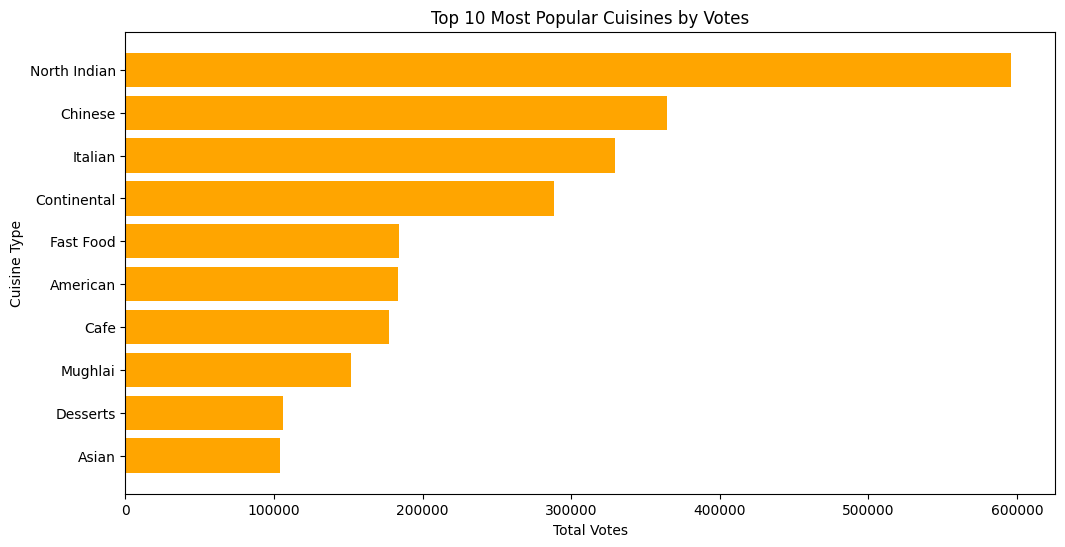

In [24]:

# Handle missing values in 'Cuisines' and 'Votes'
Restaurant_enterprise_data_task3['Cuisines'] = Restaurant_enterprise_data_task3['Cuisines'].fillna('Unknown')
Restaurant_enterprise_data_task3['Votes'] = Restaurant_enterprise_data_task3['Votes'].fillna(0)

# Split multiple cuisines into separate rows
df_cuisines = Restaurant_enterprise_data_task3.assign(Cuisines=Restaurant_enterprise_data_task3['Cuisines'].str.split(',')).explode('Cuisines')

# Clean whitespace from cuisine names
df_cuisines['Cuisines'] = df_cuisines['Cuisines'].str.strip()

# Group by cuisine type and sum the votes
cuisine_votes = df_cuisines.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort by votes in descending order
cuisine_votes = cuisine_votes.sort_values(by='Votes', ascending=False)

# Display the top 10 cuisines by total votes
print(cuisine_votes.head(10))

# Visualize the top 10 cuisines
plt.figure(figsize=(12, 6))
plt.barh(cuisine_votes['Cuisines'][:10][::-1], cuisine_votes['Votes'][:10][::-1], color='orange')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Most Popular Cuisines by Votes')
plt.show()


In [25]:
#DeterminING if there are any specific cuisines that tend to receive higher ratings

       Cuisines  Aggregate rating
131       Sunda          4.900000
26       B�_rek          4.700000
133   Taiwanese          4.650000
113       Ramen          4.500000
43      Dim Sum          4.466667
61     Hawaiian          4.412500
47       D�_ner          4.400000
23   Bubble Tea          4.400000
40        Curry          4.400000
75        Kebab          4.380000


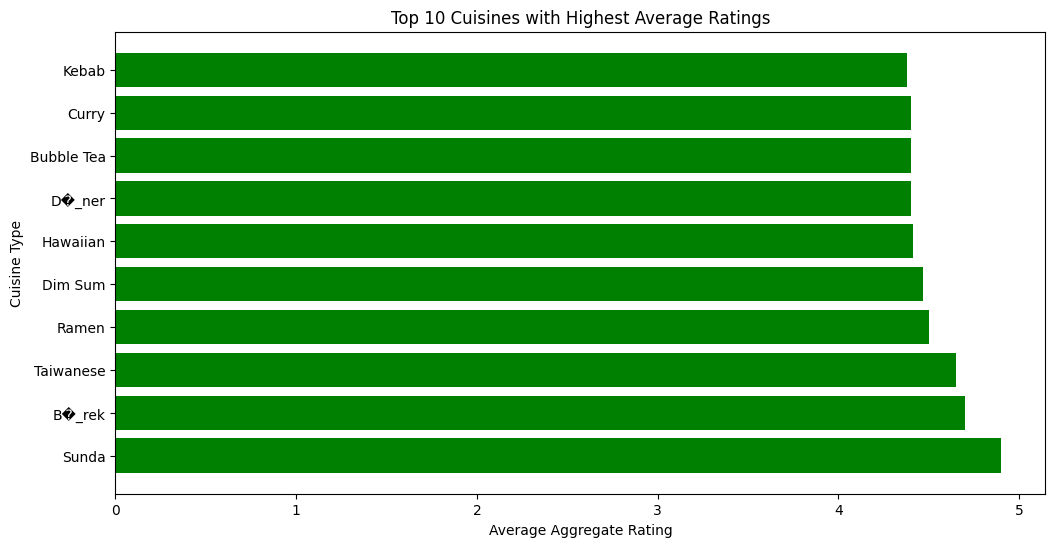

In [26]:

# Handle missing values in 'Cuisines' and 'Aggregate rating'
Restaurant_enterprise_data_task3['Cuisines'] = Restaurant_enterprise_data_task3['Cuisines'].fillna('Unknown')
Restaurant_enterprise_data_task3['Aggregate rating'] = Restaurant_enterprise_data_task3['Aggregate rating'].fillna(0)

# Split multiple cuisines into separate rows
df_cuisines = Restaurant_enterprise_data_task3.assign(Cuisines=Restaurant_enterprise_data_task3['Cuisines'].str.split(',')).explode('Cuisines')

# Clean whitespace from cuisine names
df_cuisines['Cuisines'] = df_cuisines['Cuisines'].str.strip()

# Group by cuisine type and calculate the average rating
cuisine_ratings = df_cuisines.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Display the top 10 cuisines with the highest average ratings
print(cuisine_ratings.head(10))

# Visualize the top 10 cuisines by average rating
plt.figure(figsize=(12, 6))
plt.barh(cuisine_ratings['Cuisines'][:10][::-1], cuisine_ratings['Aggregate rating'][:10][::-1], color='green')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with Highest Average Ratings')
plt.gca().invert_yaxis()
plt.show()


# Data Visualization. Level 3 (Task 3)

In [28]:
# Create visualizations representING the distribution of ratings using different charts (histogram, bar plot, etc.)

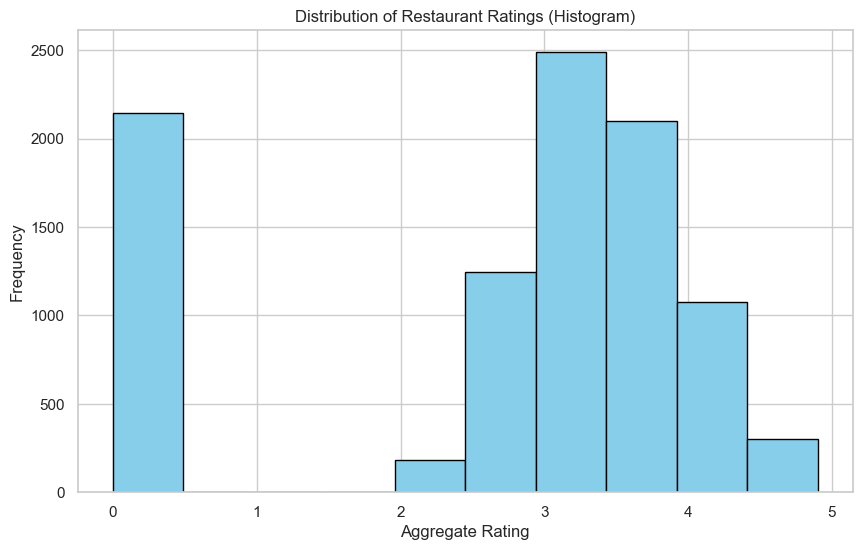

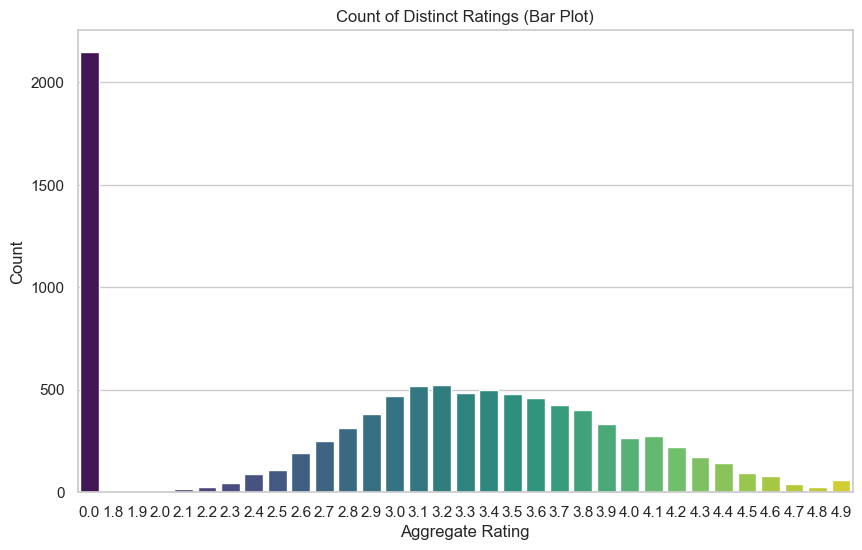

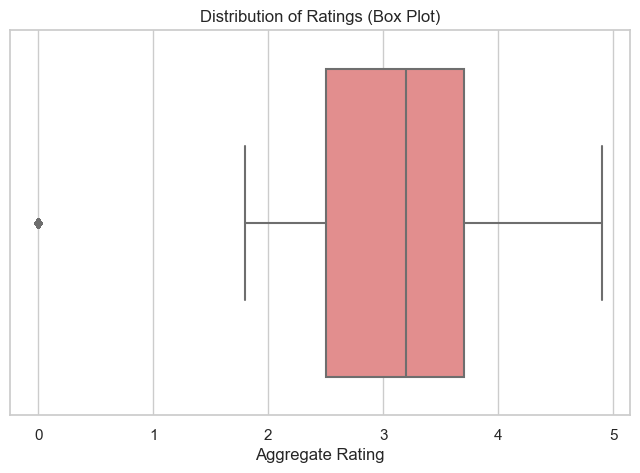

C:\Users\HP\AppData\Local\Temp\ipykernel_6056\2355170747.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Restaurant_enterprise_data_task3['Aggregate rating'], shade=True, color='purple')


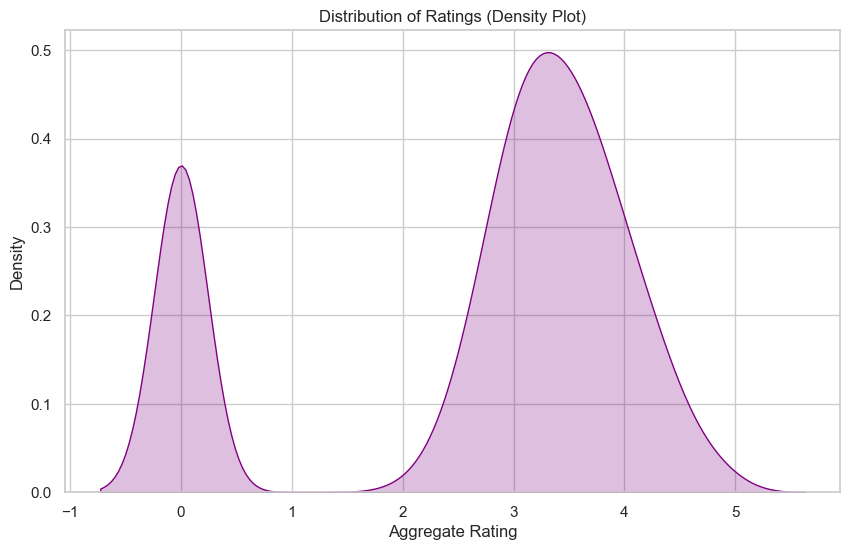

In [30]:
import seaborn as sns
# Handle missing values in 'Aggregate rating'
Restaurant_enterprise_data_task3['Aggregate rating'] = Restaurant_enterprise_data_task3['Aggregate rating'].fillna(0)

# Set a consistent style for plots
sns.set(style="whitegrid")

# Histogram: Frequency of Ratings
plt.figure(figsize=(10, 6))
plt.hist(Restaurant_enterprise_data_task3['Aggregate rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings (Histogram)')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Bar Plot: Count of Distinct Ratings
rating_counts = Restaurant_enterprise_data_task3['Aggregate rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Count of Distinct Ratings (Bar Plot)')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

# Box Plot: Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x=Restaurant_enterprise_data_task3['Aggregate rating'], color='lightcoral')
plt.title('Distribution of Ratings (Box Plot)')
plt.xlabel('Aggregate Rating')
plt.show()

# Density Plot: Smooth Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.kdeplot(Restaurant_enterprise_data_task3['Aggregate rating'], shade=True, color='purple')
plt.title('Distribution of Ratings (Density Plot)')
plt.xlabel('Aggregate Rating')
plt.ylabel('Density')
plt.show()


In [31]:
#ComparING the average ratings of different cuisines or cities using appropriate visualizations

       Cuisines  Aggregate rating
131       Sunda          4.900000
26       B�_rek          4.700000
133   Taiwanese          4.650000
113       Ramen          4.500000
43      Dim Sum          4.466667
61     Hawaiian          4.412500
47       D�_ner          4.400000
23   Bubble Tea          4.400000
40        Curry          4.400000
75        Kebab          4.380000


C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


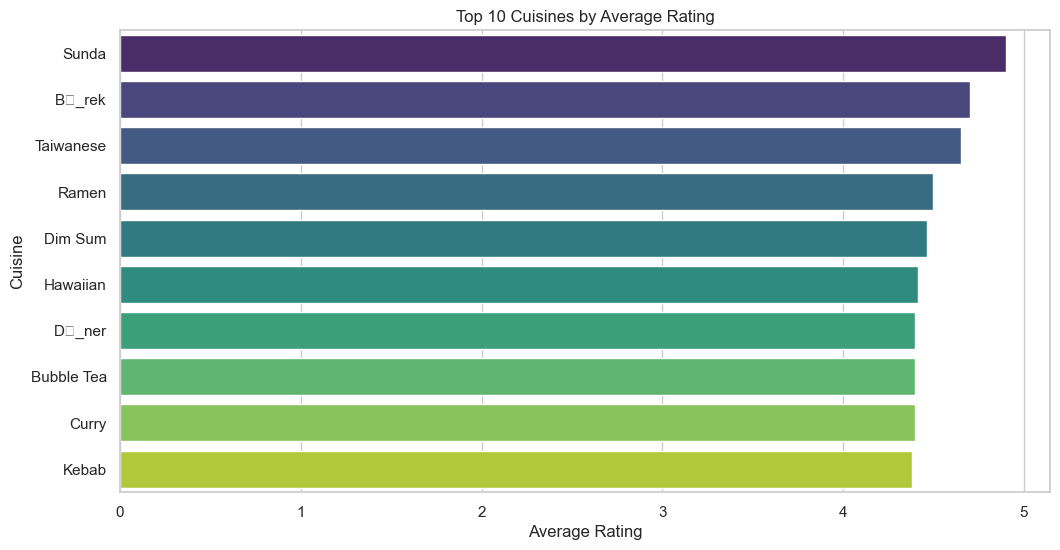

In [32]:

# Handle missing values in 'Cuisines' and 'Aggregate rating'
Restaurant_enterprise_data_task3['Cuisines'] = Restaurant_enterprise_data_task3['Cuisines'].fillna('Unknown')
Restaurant_enterprise_data_task3['Aggregate rating'] = Restaurant_enterprise_data_task3['Aggregate rating'].fillna(0)

# Split multiple cuisines into separate rows
df_cuisines = Restaurant_enterprise_data_task3.assign(Cuisines=Restaurant_enterprise_data_task3['Cuisines'].str.split(',')).explode('Cuisines')

# Clean whitespace from cuisine names
df_cuisines['Cuisines'] = df_cuisines['Cuisines'].str.strip()

# Group by cuisine type and calculate average rating
avg_rating_cuisines = df_cuisines.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
avg_rating_cuisines = avg_rating_cuisines.sort_values(by='Aggregate rating', ascending=False)

# Display top 10 cuisines by average rating
print(avg_rating_cuisines.head(10))

# Visualize the top 10 cuisines by average rating
plt.figure(figsize=(12, 6))
sns.barplot(x='Aggregate rating', y='Cuisines', data=avg_rating_cuisines.head(10), palette='viridis')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


In [33]:
#Average Ratings by City

                 City  Aggregate rating
56         Inner City          4.900000
107       Quezon City          4.800000
73        Makati City          4.650000
95         Pasig City          4.633333
75   Mandaluyong City          4.625000
15         Beechworth          4.600000
67             London          4.535000
123       Taguig City          4.525000
122     Tagaytay City          4.500000
116      Secunderabad          4.500000


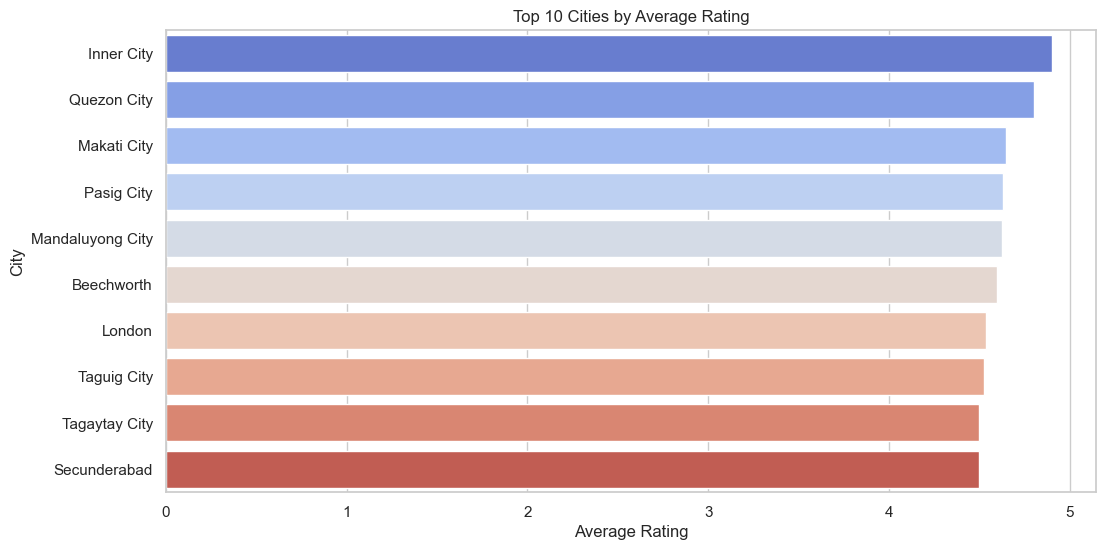

In [34]:
# Group by city and calculate average rating
avg_rating_cities = Restaurant_enterprise_data_task3.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
avg_rating_cities = avg_rating_cities.sort_values(by='Aggregate rating', ascending=False)

# Display top 10 cities by average rating
print(avg_rating_cities.head(10))

# Visualize the top 10 cities by average rating
plt.figure(figsize=(12, 6))
sns.barplot(x='Aggregate rating', y='City', data=avg_rating_cities.head(10), palette='coolwarm')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


In [37]:
#Visualizing the relationship between various features and the target variable to gain insights

C:\Users\HP\AppData\Local\Temp\ipykernel_6056\752584194.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Restaurant_enterprise_data_task3.corr()


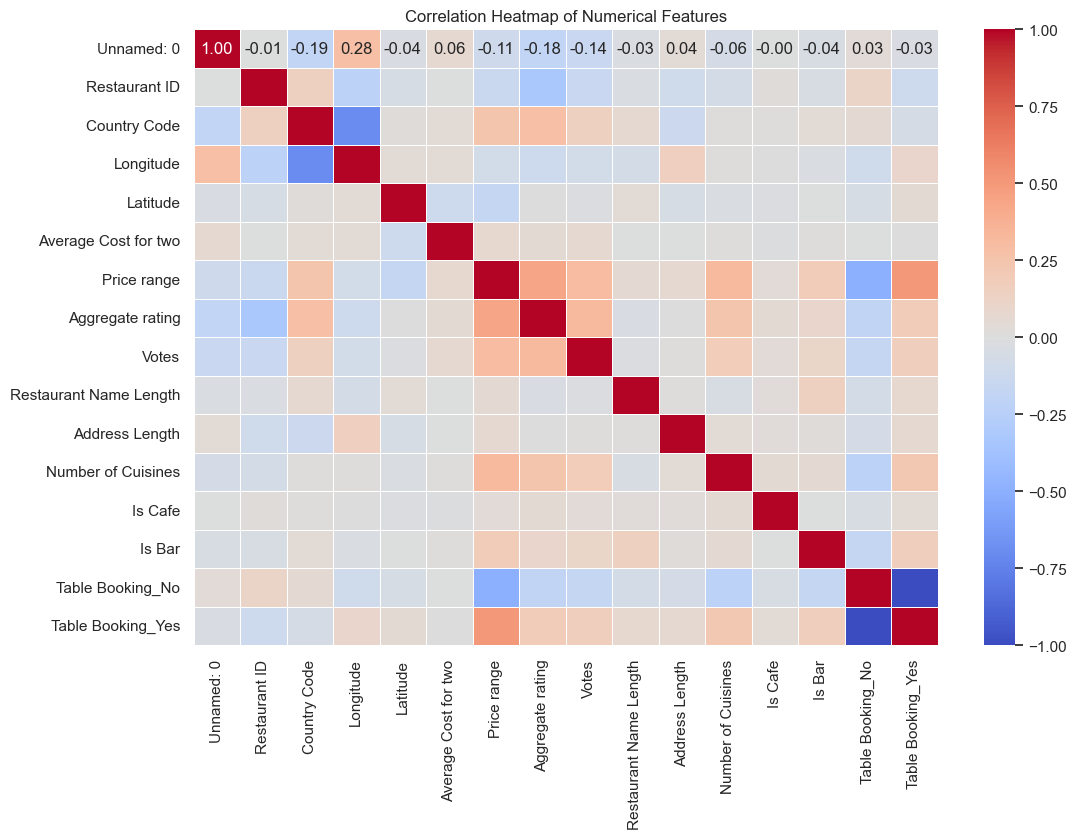

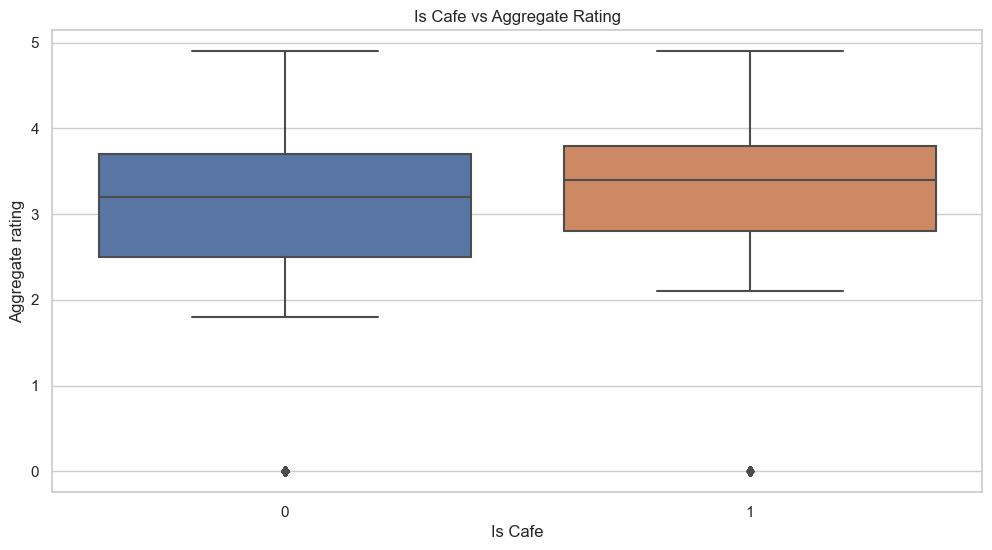

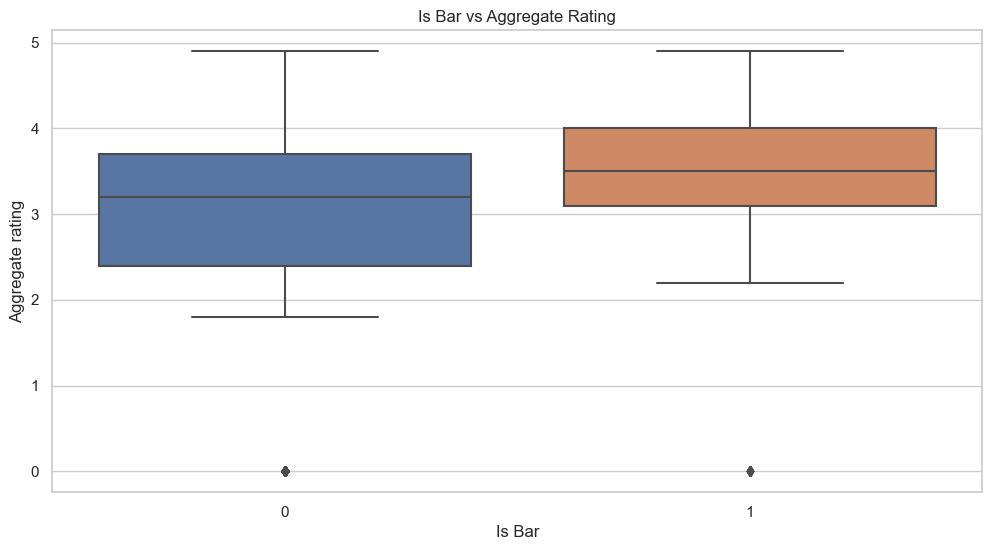

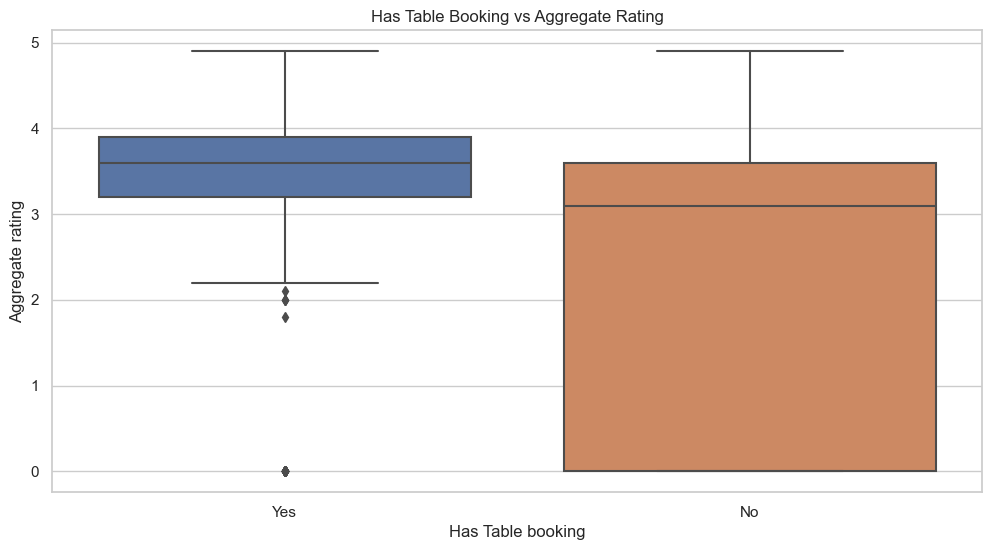

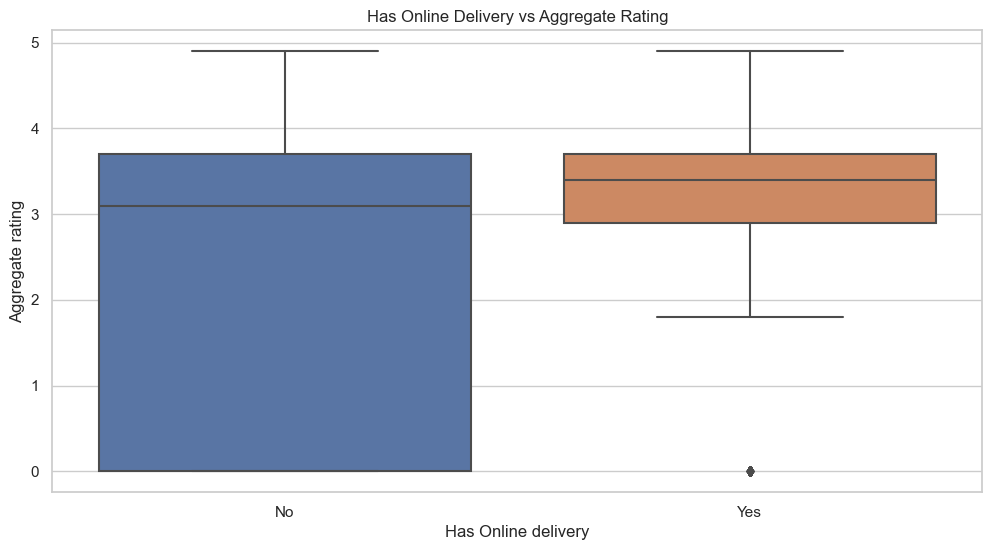

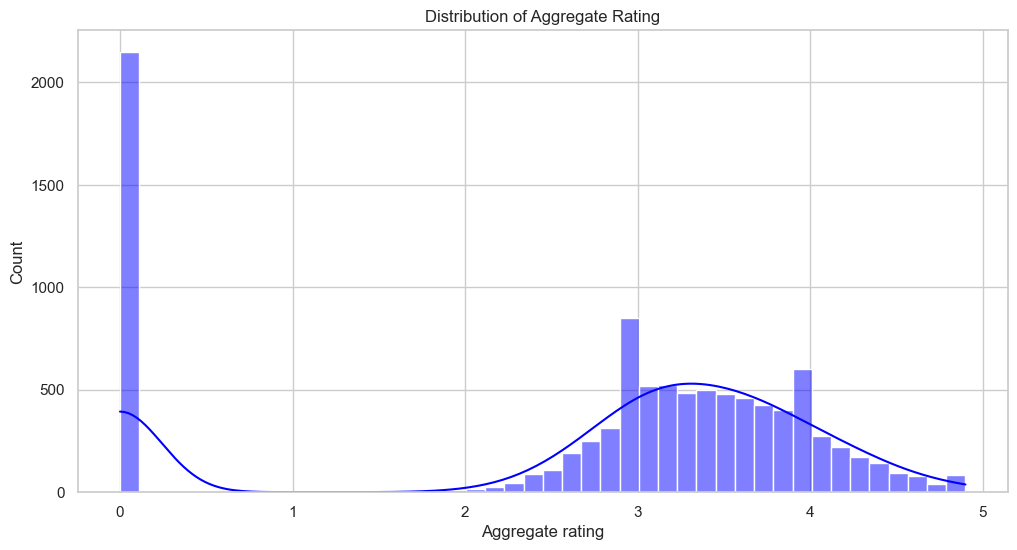

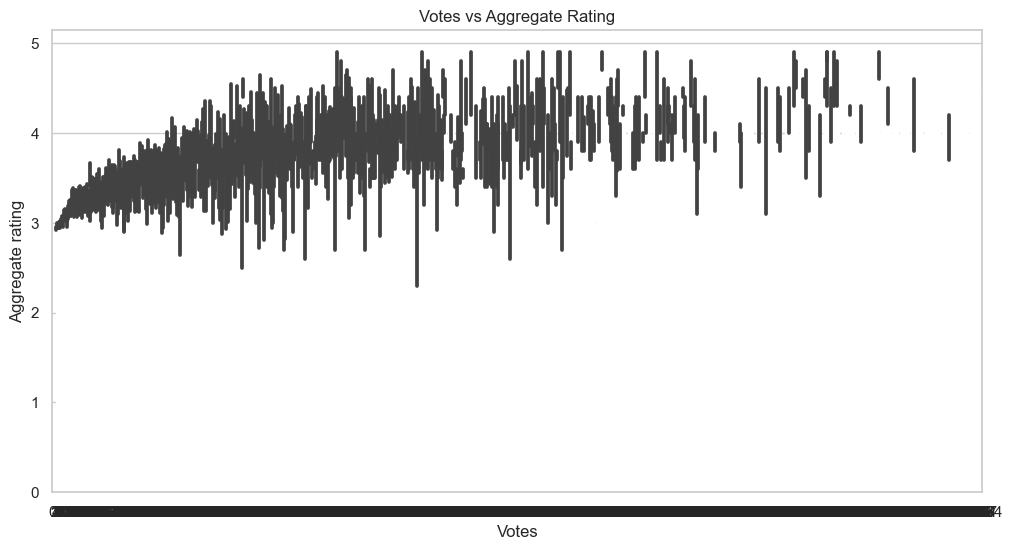

In [38]:
# Set the style for better visuals
sns.set(style="whitegrid")

# 1. Correlation heatmap for numerical variables
corr_matrix = Restaurant_enterprise_data_task3.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# 2. Boxplots for categorical variables vs. Aggregate rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Is Cafe', y='Aggregate rating', data=Restaurant_enterprise_data_task3)
plt.title("Is Cafe vs Aggregate Rating")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Is Bar', y='Aggregate rating', data=Restaurant_enterprise_data_task3)
plt.title("Is Bar vs Aggregate Rating")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=Restaurant_enterprise_data_task3)
plt.title("Has Table Booking vs Aggregate Rating")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=Restaurant_enterprise_data_task3)
plt.title("Has Online Delivery vs Aggregate Rating")
plt.show()

# 3. Distribution plot for Aggregate Rating
plt.figure(figsize=(12, 6))
sns.histplot(Restaurant_enterprise_data_task3['Aggregate rating'], kde=True, color='blue')
plt.title("Distribution of Aggregate Rating")
plt.show()

# 4. Bar plot for the number of votes vs Aggregate rating
plt.figure(figsize=(12, 6))
sns.barplot(x='Votes', y='Aggregate rating', data=Restaurant_enterprise_data_task3)
plt.title("Votes vs Aggregate Rating")
plt.show()
